In [1]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np

In [2]:
df_nfl  = pd.read_pickle('2013-2023_plays.pkl')

In [3]:
df = df_nfl[['result','spread_line']].drop_duplicates()

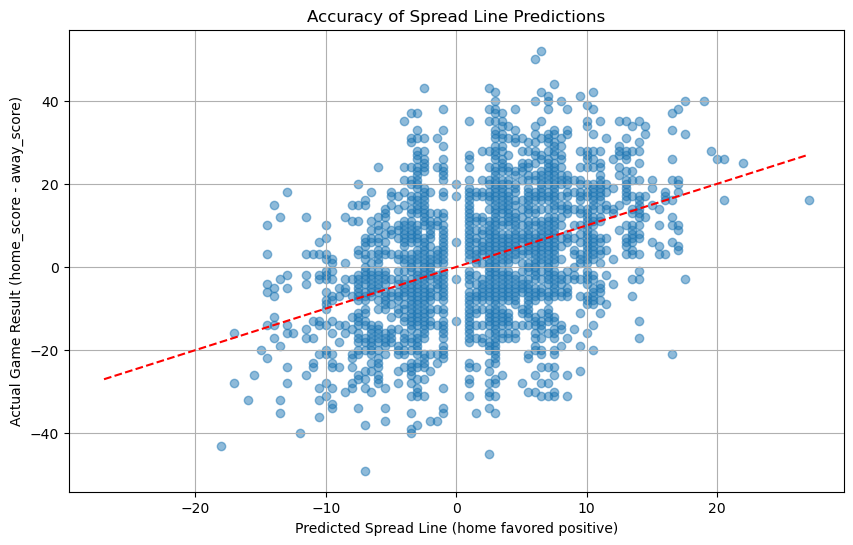

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and it's already loaded with 'result' and 'spread_line' columns
# result = home_score - away_score
# spread_line = positive if home team is favored, negative if away team is favored

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['spread_line'], df['result'], alpha=0.5)  # alpha for transparency

# Adding a reference line at y=x to see how predictions stack up against actual results
plt.plot([-max(df['spread_line']), max(df['spread_line'])], [-max(df['spread_line']), max(df['spread_line'])], color='red', linestyle='--')

plt.title('Accuracy of Spread Line Predictions')
plt.xlabel('Predicted Spread Line (home favored positive)')
plt.ylabel('Actual Game Result (home_score - away_score)')
plt.grid(True)
plt.show()


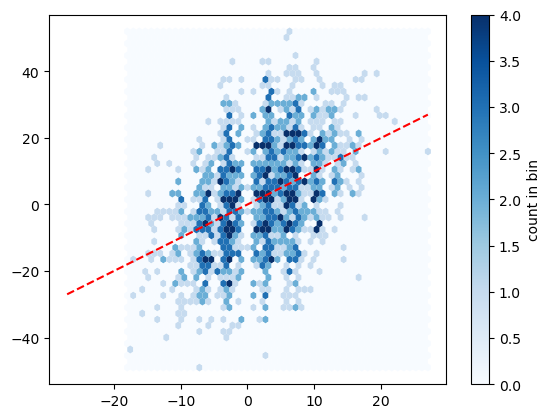

In [5]:
plt.hexbin(df['spread_line'], df['result'], gridsize=50, cmap='Blues', edgecolors='none')
cb = plt.colorbar(label='count in bin')
plt.plot([-max(df['spread_line']), max(df['spread_line'])], [-max(df['spread_line']), max(df['spread_line'])], color='red', linestyle='--')
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
grouped = df.groupby('spread_line')['result'].median().reset_index()


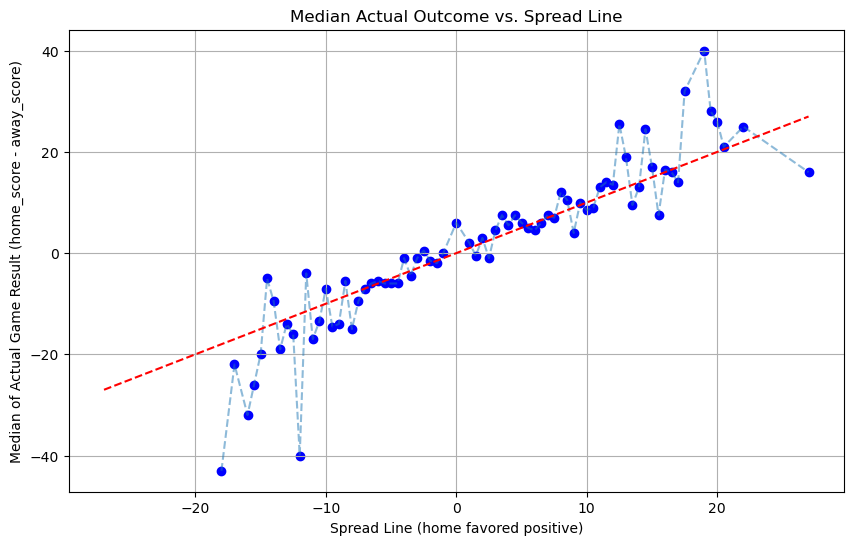

In [7]:
# Assuming 'df' is your DataFrame
# Group by 'spread_line' and calculate the median of 'result'
grouped = df.groupby('spread_line')['result'].median().reset_index()
grouped.columns = ['spread_line', 'median_result']  # Rename the columns appropriately

# Now plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped['spread_line'], grouped['median_result'], color='blue')
plt.plot(grouped['spread_line'], grouped['median_result'], linestyle='--', alpha=0.5)  # Optional: line connecting the points

# Adding a reference line at y=x to see how predictions stack up against actual results
plt.plot([-max(grouped['spread_line']), max(grouped['spread_line'])], [-max(grouped['spread_line']), max(grouped['spread_line'])], color='red', linestyle='--')

plt.title('Median Actual Outcome vs. Spread Line')
plt.xlabel('Spread Line (home favored positive)')
plt.ylabel('Median of Actual Game Result (home_score - away_score)')
plt.grid(True)
plt.show()


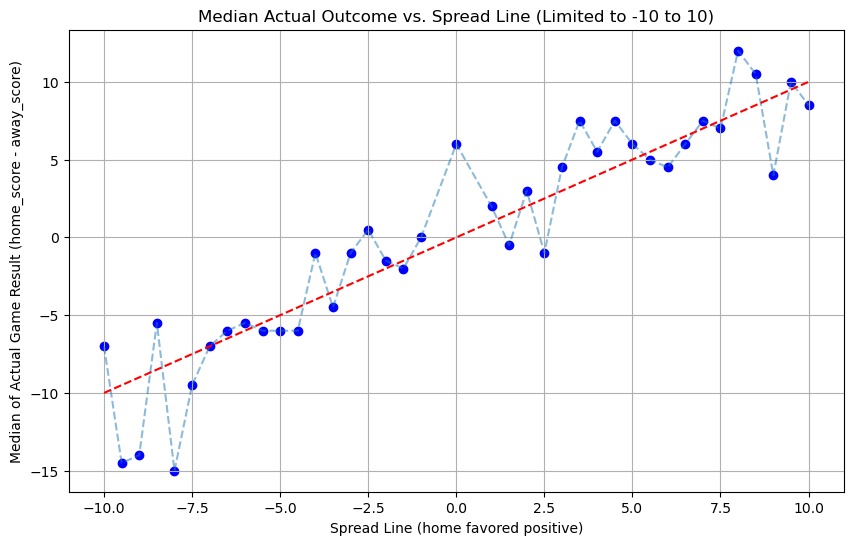

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter the DataFrame to include only rows where 'spread_line' is between -10 and 10
filtered_df = df[(df['spread_line'] >= -10) & (df['spread_line'] <= 10)]

# Group by 'spread_line' and calculate the median of 'result'
grouped = filtered_df.groupby('spread_line')['result'].median().reset_index()
grouped.columns = ['spread_line', 'median_result']  # Rename the columns appropriately

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(grouped['spread_line'], grouped['median_result'], color='blue')
plt.plot(grouped['spread_line'], grouped['median_result'], linestyle='--', alpha=0.5)  # Optional: line connecting the points

# Adding a reference line at y=x to see how predictions stack up against actual results
plt.plot([-10, 10], [-10, 10], color='red', linestyle='--')

plt.title('Median Actual Outcome vs. Spread Line (Limited to -10 to 10)')
plt.xlabel('Spread Line (home favored positive)')
plt.ylabel('Median of Actual Game Result (home_score - away_score)')
plt.grid(True)
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded with 'result' and 'spread_line' columns
# Adding a column to indicate whether the spread was covered
df['covered'] = ((df['spread_line'] > 0) & (df['result'] > df['spread_line'])) | ((df['spread_line'] < 0) & (df['result'] < df['spread_line']))

# Group by 'spread_line' and calculate the cover rate
cover_rate = df.groupby('spread_line')['covered'].mean().reset_index()
cover_rate.columns = ['spread_line', 'cover_rate']  # Rename the columns for clarity


In [15]:
plt.figure(figsize=(12, 6))
plt.bar(cover_rate['spread_line'], cover_rate['cover_rate'], color='blue')

plt.title('Cover Rate of Favored Team at Each Spread Number')
plt.xlabel('Spread Line (home favored positive, away favored negative)')
plt.ylabel('Cover Rate')
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--')  # Optional: Line at 50% cover rate for reference
plt.show()


IndexError: invalid index to scalar variable.

<Figure size 1200x600 with 0 Axes>

/var/folders/v5/23qsn2tj1pg_yz86qk9f46b40000gp/T/ipykernel_6365/2456484380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['covered'] = ((filtered_df['spread_line'] > 0) & (filtered_df['result'] > filtered_df['spread_line'])) | ((filtered_df['spread_line'] < 0) & (filtered_df['result'] < filtered_df['spread_line']))


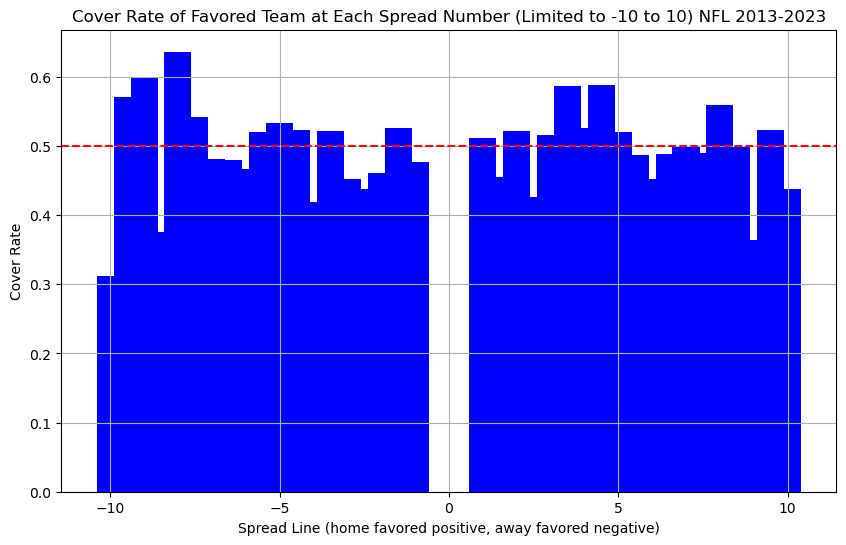

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter the DataFrame to include only rows where 'spread_line' is between -10 and 10
filtered_df = df[(df['spread_line'] >= -10) & (df['spread_line'] <= 10)]

# Adding a column to indicate whether the spread was covered
filtered_df['covered'] = ((filtered_df['spread_line'] > 0) & (filtered_df['result'] > filtered_df['spread_line'])) | ((filtered_df['spread_line'] < 0) & (filtered_df['result'] < filtered_df['spread_line']))

# Group by 'spread_line' and calculate the cover rate
cover_rate = filtered_df.groupby('spread_line')['covered'].mean().reset_index()
cover_rate.columns = ['spread_line', 'cover_rate']  # Rename the columns for clarity

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(cover_rate['spread_line'], cover_rate['cover_rate'], color='blue')

plt.title('Cover Rate of Favored Team at Each Spread Number (Limited to -10 to 10) NFL 2013-2023')
plt.xlabel('Spread Line (home favored positive, away favored negative)')
plt.ylabel('Cover Rate')
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--')  # Optional: Line at 50% cover rate for reference
plt.show()


In [12]:
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'spread_line' and 'result'

# Create a new column to determine if the favorite covered the spread
# For the favorite to cover:
# - If home team is favorite (spread_line > 0), they need to win by more than the spread.
# - If away team is favorite (spread_line < 0), they need to lose by less than the spread (in absolute terms).
df['favorite_covered'] = ((df['spread_line'] > 0) & (df['result'] > df['spread_line'])) | \
                         ((df['spread_line'] < 0) & (df['result'] > df['spread_line']))

# Calculate the percentage of times the favorite covered the spread
cover_rate = df['favorite_covered'].mean() * 100

print(f"The favorite covered the spread {cover_rate:.2f}% of the time.")


The favorite covered the spread 50.18% of the time.
